# 1.1 Tabular Model to Predict Normal Abnormal from OMA Eigenvalues


In [ ]:
#hide
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
df_raw = pd.read_csv('/content/dataex3.csv') #read the csv file
df_raw #show the csv file

,ecg_id,patient_id,norm,phi1,...,phi569,phi570,phi571,phi572
0,2,13243,1,-0.013816,...,0.017995,0.018907,0.000000,0.000000
1,3,20372,1,-0.007283,...,0.017110,0.018061,0.019140,0.021459
2,7,16193,1,0.007378,...,0.018409,0.019364,0.000000,0.000000
3,10,9456,1,0.010824,...,0.014040,0.015008,0.015910,0.017003
4,12,11031,1,-0.009129,...,0.013735,0.014842,0.015706,0.000000
...,...,...,...,...,...,...,...,...,...
714,995,6672,1,-0.050721,...,0.029663,0.031627,0.000000,0.000000
715,996,1010,0,0.053600,...,0.017610,0.019121,0.020690,0.000000
716,997,381,0,0.020266,...,0.014764,0.015547,0.016629,0.000000
717,998,6058,0,0.000655,...,0.011749,0.013010,0.014474,0.000000


In [ ]:
df_raw.iloc[[40],:] #check that import worked and variable is indexed right

,ecg_id,patient_id,norm,phi1,...,phi569,phi570,phi571,phi572
40,74,11671,1,-0.008199,...,0.014851,0.01595,0.016975,0.0


Text(0.5, 1.0, 'phi50')

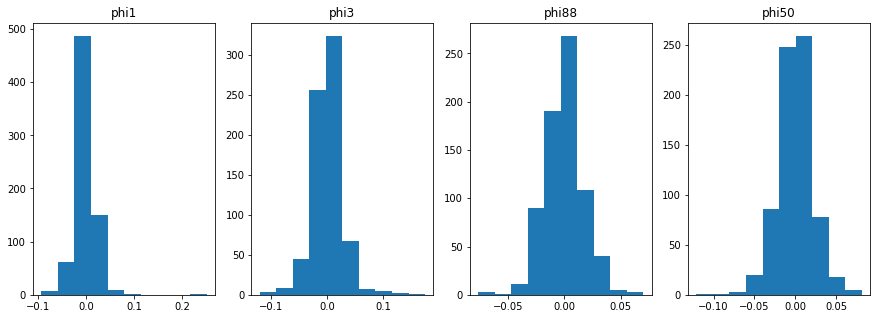

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5)) #plot some variables, looking for nan's and weirdness
axs[0].hist(df_raw.phi1)
axs[0].set_title('phi1')
axs[1].hist(df_raw.phi3)
axs[1].set_title('phi3')
axs[2].hist(df_raw.phi88)
axs[2].set_title('phi88')
axs[3].hist(df_raw.phi50)
axs[3].set_title('phi50')

In [ ]:
df_proc=df_raw.drop(columns=['patient_id'])
df_proc=df_proc.drop(columns=['ecg_id'])

In [ ]:
cont_names=[]; #defining the continuous variables
for col in df_proc.columns: 
    cont_names.append(col) #select all columns of the csv


In [ ]:
#cont_names.remove('ecg_id') #remove ecvg_id (categorical variable)
#cont_names.remove('patient_id') #remove patient_id (categorical variable)
cont_names.remove('norm') #remove norm (categorical variable)

In [ ]:
dls = TabularDataLoaders.from_df(df_proc, y_names="norm", #select norm column as target
    #cat_names = ['ecg_id'], 
    y_block=CategoryBlock, #select categorical variables and set output as cat
    cont_names = cont_names, #set contiuous variables from list above
    procs = [Categorify, FillMissing]) #preprocessing

In [ ]:
dls.show(1) #verify df is working

,phi1,phi2,phi3,phi4,phi5,phi6,phi7,phi8,phi9,phi10,phi11,phi12,phi13,phi14,phi15,phi16,phi17,phi18,phi19,phi20,phi21,phi22,phi23,phi24,phi25,phi26,phi27,phi28,phi29,phi30,phi31,phi32,phi33,phi34,phi35,phi36,phi37,phi38,phi39,phi40,phi41,phi42,phi43,phi44,phi45,phi46,phi47,phi48,phi49,phi50,phi51,phi52,phi53,phi54,phi55,phi56,phi57,phi58,phi59,phi60,phi61,phi62,phi63,phi64,phi65,phi66,phi67,phi68,phi69,phi70,phi71,phi72,phi73,phi74,phi75,phi76,phi77,phi78,phi79,phi80,phi81,phi82,phi83,phi84,phi85,phi86,phi87,phi88,phi89,phi90,phi91,phi92,phi93,phi94,phi95,phi96,phi97,phi98,phi99,phi100,phi101,phi102,phi103,phi104,phi105,phi106,phi107,phi108,phi109,phi110,phi111,phi112,phi113,phi114,phi115,phi116,phi117,phi118,phi119,phi120,phi121,phi122,phi123,phi124,phi125,phi126,phi127,phi128,phi129,phi130,phi131,phi132,phi133,phi134,phi135,phi136,phi137,phi138,phi139,phi140,phi141,phi142,phi143,phi144,phi145,phi146,phi147,phi148,phi149,phi150,phi151,phi152,phi153,phi154,phi155,phi156,phi157,phi158,phi159,phi160,phi161,phi162,phi163,phi164,phi165,phi166,phi167,phi168,phi169,phi170,phi171,phi172,phi173,phi174,phi175,phi176,phi177,phi178,phi179,phi180,phi181,phi182,phi183,phi184,phi185,phi186,phi187,phi188,phi189,phi190,phi191,phi192,phi193,phi194,phi195,phi196,phi197,phi198,phi199,phi200,phi201,phi202,phi203,phi204,phi205,phi206,phi207,phi208,phi209,phi210,phi211,phi212,phi213,phi214,phi215,phi216,phi217,phi218,phi219,phi220,phi221,phi222,phi223,phi224,phi225,phi226,phi227,phi228,phi229,phi230,phi231,phi232,phi233,phi234,phi235,phi236,phi237,phi238,phi239,phi240,phi241,phi242,phi243,phi244,phi245,phi246,phi247,phi248,phi249,phi250,phi251,phi252,phi253,phi254,phi255,phi256,phi257,phi258,phi259,phi260,phi261,phi262,phi263,phi264,phi265,phi266,phi267,phi268,phi269,phi270,phi271,phi272,phi273,phi274,phi275,phi276,phi277,phi278,phi279,phi280,phi281,phi282,phi283,phi284,phi285,phi286,phi287,phi288,phi289,phi290,phi291,phi292,phi293,phi294,phi295,phi296,phi297,phi298,phi299,phi300,phi301,phi302,phi303,phi304,phi305,phi306,phi307,phi308,phi309,phi310,phi311,phi312,phi313,phi314,phi315,phi316,phi317,phi318,phi319,phi320,phi321,phi322,phi323,phi324,phi325,phi326,phi327,phi328,phi329,phi330,phi331,phi332,phi333,phi334,phi335,phi336,phi337,phi338,phi339,phi340,phi341,phi342,phi343,phi344,phi345,phi346,phi347,phi348,phi349,phi350,phi351,phi352,phi353,phi354,phi355,phi356,phi357,phi358,phi359,phi360,phi361,phi362,phi363,phi364,phi365,phi366,phi367,phi368,phi369,phi370,phi371,phi372,phi373,phi374,phi375,phi376,phi377,phi378,phi379,phi380,phi381,phi382,phi383,phi384,phi385,phi386,phi387,phi388,phi389,phi390,phi391,phi392,phi393,phi394,phi395,phi396,phi397,phi398,phi399,phi400,phi401,phi402,phi403,phi404,phi405,phi406,phi407,phi408,phi409,phi410,phi411,phi412,phi413,phi414,phi415,phi416,phi417,phi418,phi419,phi420,phi421,phi422,phi423,phi424,phi425,phi426,phi427,phi428,phi429,phi430,phi431,phi432,phi433,phi434,phi435,phi436,phi437,phi438,phi439,phi440,phi441,phi442,phi443,phi444,phi445,phi446,phi447,phi448,phi449,phi450,phi451,phi452,phi453,phi454,phi455,phi456,phi457,phi458,phi459,phi460,phi461,phi462,phi463,phi464,phi465,phi466,phi467,phi468,phi469,phi470,phi471,phi472,phi473,phi474,phi475,phi476,phi477,phi478,phi479,phi480,phi481,phi482,phi483,phi484,phi485,phi486,phi487,phi488,phi489,phi490,phi491,phi492,phi493,phi494,phi495,phi496,phi497,phi498,phi499,phi500,phi501,phi502,phi503,phi504,phi505,phi506,phi507,phi508,phi509,phi510,phi511,phi512,phi513,phi514,phi515,phi516,phi517,phi518,phi519,phi520,phi521,phi522,phi523,phi524,phi525,phi526,phi527,phi528,phi529,phi530,phi531,phi532,phi533,phi534,phi535,phi536,phi537,phi538,phi539,phi540,phi541,phi542,phi543,phi544,phi545,phi546,phi547,phi548,phi549,phi550,phi551,phi552,phi553,phi554,phi555,phi556,phi557,phi558,phi559,phi560,phi561,phi562,phi563,phi564,phi565,phi566,phi567,phi568,phi569,phi570,phi571,phi572,norm
207,0.026353,0.006652,-0.019709,-0.01638,0.023039,-0.006483,0.005701,0.011158,0.010699,0.017705,0.

In [ ]:
learn = tabular_learner(dls, metrics=[accuracy], layers=[20000,10]) #formulate tabular learner

In [ ]:
learn.fit_one_cycle(10) #train for ten epochs

epoch,train_loss,valid_loss,accuracy,time
0,0.779617,0.811431,0.531469,00:00
1,0.597448,1.106991,0.531469,00:00
2,0.497141,1.289736,0.531469,00:00
3,0.423707,1.285878,0.531469,00:00
4,0.364322,1.165769,0.531469,00:00


In [ ]:
learn.show_results()

,phi1,phi2,phi3,phi4,phi5,phi6,phi7,phi8,phi9,phi10,phi11,phi12,phi13,phi14,phi15,phi16,phi17,phi18,phi19,phi20,phi21,phi22,phi23,phi24,phi25,phi26,phi27,phi28,phi29,phi30,phi31,phi32,phi33,phi34,phi35,phi36,phi37,phi38,phi39,phi40,phi41,phi42,phi43,phi44,phi45,phi46,phi47,phi48,phi49,phi50,phi51,phi52,phi53,phi54,phi55,phi56,phi57,phi58,phi59,phi60,phi61,phi62,phi63,phi64,phi65,phi66,phi67,phi68,phi69,phi70,phi71,phi72,phi73,phi74,phi75,phi76,phi77,phi78,phi79,phi80,phi81,phi82,phi83,phi84,phi85,phi86,phi87,phi88,phi89,phi90,phi91,phi92,phi93,phi94,phi95,phi96,phi97,phi98,phi99,phi100,phi101,phi102,phi103,phi104,phi105,phi106,phi107,phi108,phi109,phi110,phi111,phi112,phi113,phi114,phi115,phi116,phi117,phi118,phi119,phi120,phi121,phi122,phi123,phi124,phi125,phi126,phi127,phi128,phi129,phi130,phi131,phi132,phi133,phi134,phi135,phi136,phi137,phi138,phi139,phi140,phi141,phi142,phi143,phi144,phi145,phi146,phi147,phi148,phi149,phi150,phi151,phi152,phi153,phi154,phi155,phi156,phi157,phi158,phi159,phi160,phi161,phi162,phi163,phi164,phi165,phi166,phi167,phi168,phi169,phi170,phi171,phi172,phi173,phi174,phi175,phi176,phi177,phi178,phi179,phi180,phi181,phi182,phi183,phi184,phi185,phi186,phi187,phi188,phi189,phi190,phi191,phi192,phi193,phi194,phi195,phi196,phi197,phi198,phi199,phi200,phi201,phi202,phi203,phi204,phi205,phi206,phi207,phi208,phi209,phi210,phi211,phi212,phi213,phi214,phi215,phi216,phi217,phi218,phi219,phi220,phi221,phi222,phi223,phi224,phi225,phi226,phi227,phi228,phi229,phi230,phi231,phi232,phi233,phi234,phi235,phi236,phi237,phi238,phi239,phi240,phi241,phi242,phi243,phi244,phi245,phi246,phi247,phi248,phi249,phi250,phi251,phi252,phi253,phi254,phi255,phi256,phi257,phi258,phi259,phi260,phi261,phi262,phi263,phi264,phi265,phi266,phi267,phi268,phi269,phi270,phi271,phi272,phi273,phi274,phi275,phi276,phi277,phi278,phi279,phi280,phi281,phi282,phi283,phi284,phi285,phi286,phi287,phi288,phi289,phi290,phi291,phi292,phi293,phi294,phi295,phi296,phi297,phi298,phi299,phi300,phi301,phi302,phi303,phi304,phi305,phi306,phi307,phi308,phi309,phi310,phi311,phi312,phi313,phi314,phi315,phi316,phi317,phi318,phi319,phi320,phi321,phi322,phi323,phi324,phi325,phi326,phi327,phi328,phi329,phi330,phi331,phi332,phi333,phi334,phi335,phi336,phi337,phi338,phi339,phi340,phi341,phi342,phi343,phi344,phi345,phi346,phi347,phi348,phi349,phi350,phi351,phi352,phi353,phi354,phi355,phi356,phi357,phi358,phi359,phi360,phi361,phi362,phi363,phi364,phi365,phi366,phi367,phi368,phi369,phi370,phi371,phi372,phi373,phi374,phi375,phi376,phi377,phi378,phi379,phi380,phi381,phi382,phi383,phi384,phi385,phi386,phi387,phi388,phi389,phi390,phi391,phi392,phi393,phi394,phi395,phi396,phi397,phi398,phi399,phi400,phi401,phi402,phi403,phi404,phi405,phi406,phi407,phi408,phi409,phi410,phi411,phi412,phi413,phi414,phi415,phi416,phi417,phi418,phi419,phi420,phi421,phi422,phi423,phi424,phi425,phi426,phi427,phi428,phi429,phi430,phi431,phi432,phi433,phi434,phi435,phi436,phi437,phi438,phi439,phi440,phi441,phi442,phi443,phi444,phi445,phi446,phi447,phi448,phi449,phi450,phi451,phi452,phi453,phi454,phi455,phi456,phi457,phi458,phi459,phi460,phi461,phi462,phi463,phi464,phi465,phi466,phi467,phi468,phi469,phi470,phi471,phi472,phi473,phi474,phi475,phi476,phi477,phi478,phi479,phi480,phi481,phi482,phi483,phi484,phi485,phi486,phi487,phi488,phi489,phi490,phi491,phi492,phi493,phi494,phi495,phi496,phi497,phi498,phi499,phi500,phi501,phi502,phi503,phi504,phi505,phi506,phi507,phi508,phi509,phi510,phi511,phi512,phi513,phi514,phi515,phi516,phi517,phi518,phi519,phi520,phi521,phi522,phi523,phi524,phi525,phi526,phi527,phi528,phi529,phi530,phi531,phi532,phi533,phi534,phi535,phi536,phi537,phi538,phi539,phi540,phi541,phi542,phi543,phi544,phi545,phi546,phi547,phi548,phi549,phi550,phi551,phi552,phi553,phi554,phi555,phi556,phi557,phi558,phi559,phi560,phi561,phi562,phi563,phi564,phi565,phi566,phi567,phi568,phi569,phi570,phi571,phi572,norm,norm_pred
0,0.018170,0.030980,0.012824,-0.024627,0.002615,0.021862,-0.003287,-0.008668,0.007756,0.

In [ ]:
preds,y,losses=learn.get_preds(with_loss=True)
interp = ClassificationInterpretation.from_learner(learn)

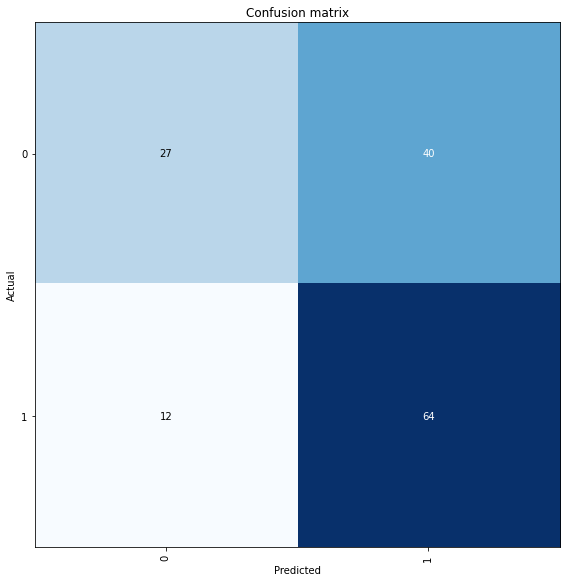

In [ ]:
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(8,8))

# Fancy Heatmap for Later

In [ ]:
# import numpy as np; np.random.seed(0)

# import seaborn as sns; sns.set_theme()
# import matplotlib.pyplot as plt

# uniform_data = np.random.rand(10, 12)

In [ ]:
# np.shape(uniform_data)
# data_seize=np.array([[191, 8], [12, 453]])
# x_axis_labels = ['Seizure','non-Seizure']
# y_axis_labels = ['Seizure','non-Seizure']

In [ ]:


# ax = sns.heatmap(data_seize,annot=True,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# sns.heatmap(data_seize,annot=True,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()